In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/DATASET-balanced.csv
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/trump-to-Obama.wav
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/margot-to-musk.wav
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/linus-to-obama.wav
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/taylor-to-trump.wav
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/taylor-to-biden.wav
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/ryan-to-trump.wav
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/obama-to-musk.wav
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/musk-to-trump.wav
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/ryan-to-musk.wav
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/trump-to-musk.wav
/kaggle/input/deep-voice-deepfake-

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [74]:
df = pd.read_csv('/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/DATASET-balanced.csv')
df.describe()



,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,...,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000
mean,0.421925,0.037894,2719.201373,3050.299988,4977.617722,0.070821,-382.562312,145.056311,-24.699932,21.311292,...,-2.242488,-4.439806,-1.657739,-2.107442,-2.606924,-1.641709,-3.320340,-3.117110,-2.754034,-4.427346
std,0.069392,0.028071,1066.754739,872.258653,2170.158448,0.039292,79.593413,36.188506,27.728976,22.480432,...,7.726415,6.614913,5.121732,5.347953,4.909579,5.627377,4.597079,4.976511,4.957660,5.478806
min,0.200353,0.000043,756.163229,1096.903152,1063.964279,0.015504,-1055.002197,-83.816765,-132.491104,-47.770000,...,-29.636639,-30.168062,-19.717999,-21.553347,-28.876045,-20.307486,-22.753056,-19.623880,-23.890470,-25.099829
25%,0.372330,0.015098,2062.875836,2569.289971,3448.144178,0.045749,-432.928848,120.522711,-35.550402,3.635681,...,-6.863236,-8.233070,-5.178427,-5.642066,-5.760252,-4.868709,-6.435052,-5.862841,-5.514250,-7.463774
50%,0.417708,0.031870,2579.963841,3055.863462,4683.958018,0.060237,-365.756241,145.970162,-19.164229,22.218458,...,-2.438328,-4.186015,-1.530670,-2.320350,-2.447045,-0.862829,-3.230387,-2.957088,-2.726495,-3.839427
75%,0.467741,0.054046,3283.857559,3581.271953,6211.301553,0.085149,-321.772781,168.321331,-6.235028,37.017731,...,2.349474,-0.266044,1.794835,1.569430,0.837690,2.043472,-0.293191,0.068411,0.495779,-0.787292
max,0.707202,0.168958,17685.006690,7836.844404,21130.544670,0.812480,-193.430145,284.727997,67.475792,86.585747,...,28.890339,22.552883,19.462509,21.356049,13.319826,19.329521,18.873386,17.924467,11.985058,11.764109


In [75]:
df['LABEL'].value_counts()


LABEL
FAKE    5889
REAL    5889
Name: count, dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11778 entries, 0 to 11777
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         11778 non-null  float64
 1   rms                 11778 non-null  float64
 2   spectral_centroid   11778 non-null  float64
 3   spectral_bandwidth  11778 non-null  float64
 4   rolloff             11778 non-null  float64
 5   zero_crossing_rate  11778 non-null  float64
 6   mfcc1               11778 non-null  float64
 7   mfcc2               11778 non-null  float64
 8   mfcc3               11778 non-null  float64
 9   mfcc4               11778 non-null  float64
 10  mfcc5               11778 non-null  float64
 11  mfcc6               11778 non-null  float64
 12  mfcc7               11778 non-null  float64
 13  mfcc8               11778 non-null  float64
 14  mfcc9               11778 non-null  float64
 15  mfcc10              11778 non-null  float64
 16  mfcc

In [77]:
df.isnull().sum()

chroma_stft           0
rms                   0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
LABEL                 0
dtype: int64

In [78]:
X = df.drop(columns=['LABEL']).values
y = df['LABEL'].values

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [80]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best hyperparameters found:", best_params)


Best hyperparameters found: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [81]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 99.75%


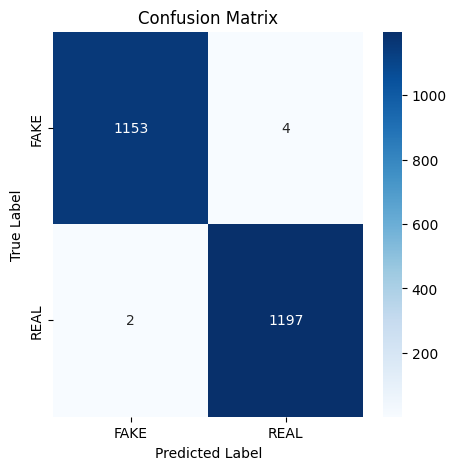

In [82]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


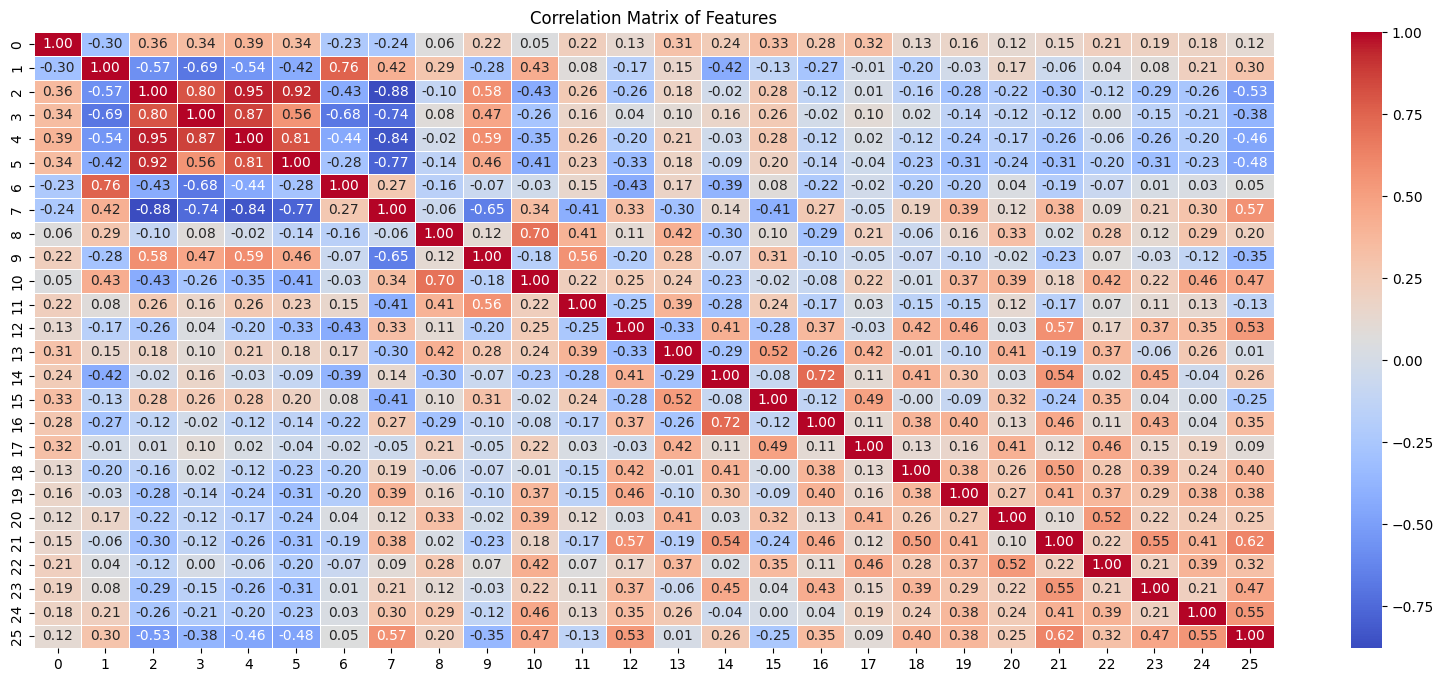

In [83]:
correlation_matrix = pd.DataFrame(X).corr()

plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()


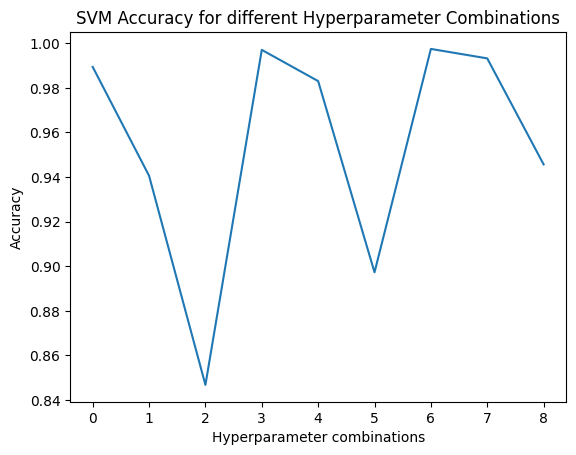

In [84]:
accuracies = []
for c in [0.1, 1, 10]:
    for gamma in ['scale', 0.01, 0.001]:
        model = SVC(C=c, gamma=gamma, kernel='rbf')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(accuracies)
plt.xlabel('Hyperparameter combinations')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy for different Hyperparameter Combinations')
plt.show()


In [85]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [86]:
def extract_features(file):
    y, sr = librosa.load(file, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc = np.mean(mfcc, axis=1)
    return mfcc

In [87]:
fake_folder = '/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE'
real_folder = '/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/REAL'


fake_audio_files = [os.path.join(fake_folder, f) for f in os.listdir(fake_folder) if f.endswith('.wav')]
real_audio_files = [os.path.join(real_folder, f) for f in os.listdir(real_folder) if f.endswith('.wav')]

X = []
y = []

In [88]:
for file in fake_audio_files:
    X.append(extract_features(file))
    y.append(1) 

# Process real audio files
for file in real_audio_files:
    X.append(extract_features(file))
    y.append(0) 

X = np.array(X)
y = np.array(y)


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

In [90]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


accuracy_per_sample = (y_test == y_pred).astype(int) 

accuracy = accuracy_score(y_test, y_pred)
print(f'Overall Accuracy: {accuracy * 100:.2f}%')


Overall Accuracy: 92.31%


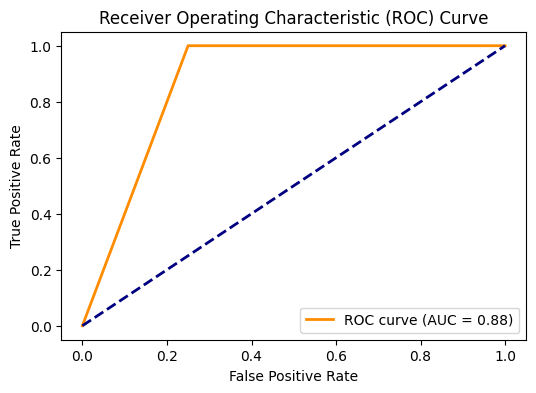

In [92]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
